# Folder Structure

```
dataset/
├── train/
│   ├── images/
│   │   ├── img1.jpg
│   └── labels/
│       ├── img1.txt
├── test/
│   ├── images/
│   │   ├── img3.jpg
│   └── labels/
│       ├── img3.txt
└── data.yaml

```

# Label Format
class_id x_center y_center width height

In [1]:
import os

def print_tree(directory, level=0):
    if not os.path.exists(directory):
        print(f"Path {directory} does not exist.")
        return
    
    files = os.listdir(directory)
    files.sort()

    num_files = sum(1 for f in files if os.path.isfile(os.path.join(directory, f)))
    
    for index, file in enumerate(files):
        path = os.path.join(directory, file)
        if os.path.isdir(path):
            print("  " * level + f"|--- {file}")
            print_tree(path, level + 1)
        else:
            if num_files > 1 and index == 0:
                print("  " * level + f"|--- {file}")
            elif num_files > 1 and index == 1:
                print("  " * level + f"|--- ...")
                break  
            else:
                print("  " * level + f"|--- {file}")

print_tree('/kaggle/input/vehicle-detection-8-classes-object-detection/train')

|--- images
  |--- Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg
  |--- ...
|--- labels
  |--- Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.txt
  |--- ...
|--- labels.npy


In [2]:
cat /kaggle/input/vehicle-detection-8-classes-object-detection/train/labels/classes.txt

auto
bus
car
lcv
motorcycle
multiaxle
tractor
truck

In [3]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

source_images = '/kaggle/input/vehicle-detection-8-classes-object-detection/train/images'
source_labels = '/kaggle/input/vehicle-detection-8-classes-object-detection/train/labels'
destination_root = '/kaggle/working/dataset'

os.makedirs(os.path.join(destination_root, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(destination_root, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(destination_root, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(destination_root, 'test/labels'), exist_ok=True)

images = [f for f in os.listdir(source_images) if f.endswith('.jpg')]
labels = [f.replace('.jpg', '.txt') for f in images]

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

for img, lbl in zip(train_images, train_labels):
    shutil.copy(os.path.join(source_images, img), os.path.join(destination_root, 'train/images', img))
    shutil.copy(os.path.join(source_labels, lbl), os.path.join(destination_root, 'train/labels', lbl))

for img, lbl in zip(test_images, test_labels):
    shutil.copy(os.path.join(source_images, img), os.path.join(destination_root, 'test/images', img))
    shutil.copy(os.path.join(source_labels, lbl), os.path.join(destination_root, 'test/labels', lbl))

In [4]:
import yaml

data_yaml = {
    'train': '/kaggle/working/dataset/train/images',
    'val': '/kaggle/working/dataset/test/images',
    'names': ['auto', 'bus', 'car', 'lcv', 'motorcycle', 'multiaxle', 'tractor', 'truck']  
}

with open('/kaggle/working/dataset/data.yaml', 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)


In [5]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 23.9 MB/s eta 0:00:0000:01


In [6]:
from ultralytics import YOLO

# Initialize the model
model = YOLO('yolov10m.yaml')

# Train the model
model.train(
    data='/kaggle/working/dataset/data.yaml', 
    epochs=30,  # Total epochs
    batch=32, 
    imgsz=640, 
    save=True,  # Save weights automatically
    save_period=10,  # Save every 10 epochs
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.82 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.yaml, data=/kaggle/working/dataset/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=N

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels... 6574 images, 13 backgrounds, 0 corrupt: 100%|██████████| 6574/6574 [00:05<00:00, 1119.40it/s]

train: WARNING ⚠️ /kaggle/working/dataset/train/images/highway_2784_2020-08-26.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/dataset/train/images/highway_3297_2020-08-26.jpg: 1 duplicate labels removed


train: New cache created: /kaggle/working/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/dataset/test/labels... 1644 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1644/1644 [00:02<00:00, 773.62it/s]


val: New cache created: /kaggle/working/dataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      15.2G      6.582      12.35      6.554         63        640: 100%|██████████| 206/206 [04:29<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:24<00:00,  1.06it/s]


                   all       1644       5127      0.244      0.118      0.091     0.0388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      15.3G      3.888      4.456      3.548         42        640: 100%|██████████| 206/206 [04:27<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127       0.37      0.358      0.287      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      15.2G      3.548      3.511      3.181         61        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.295      0.435      0.327      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      15.2G      3.366      3.116       3.02         39        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.437      0.506      0.386       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      15.1G      3.229      2.886      2.908         65        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.502      0.505      0.428      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      15.1G      3.141      2.693      2.817         54        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.474      0.557       0.46      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      15.1G      3.094      2.563      2.788         66        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127       0.38      0.569      0.471       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      15.1G      3.038      2.489      2.752         57        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.485      0.555      0.522      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      15.1G      2.966      2.378      2.708         60        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.441       0.63      0.536      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      15.1G      2.943      2.326      2.692         86        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.502      0.654      0.577       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      15.1G      2.904      2.257      2.663         72        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.534      0.655      0.603      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      15.1G      2.879      2.199      2.639         62        640: 100%|██████████| 206/206 [04:26<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.581      0.637      0.607      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      15.1G      2.839       2.14      2.613         52        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.572      0.633      0.616      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      15.2G       2.83      2.126      2.623         42        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.598       0.63      0.641      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      15.1G      2.795      2.095      2.592         66        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.586      0.699      0.654      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      15.1G        2.8      2.058      2.587         79        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.575      0.662      0.646      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      15.1G       2.75      2.042      2.568         52        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.614      0.645      0.661      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      15.2G      2.753      1.997      2.552         74        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.12it/s]

                   all       1644       5127      0.608      0.691      0.676      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      15.2G      2.706      1.979      2.544         72        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.609       0.69      0.669      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      15.1G      2.677      1.925      2.513         65        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.619      0.668      0.667      0.444


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      15.1G      2.637      1.728      2.589         38        640: 100%|██████████| 206/206 [04:26<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.633      0.686      0.684      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      15.2G      2.592      1.686       2.57         56        640: 100%|██████████| 206/206 [04:24<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.631      0.683      0.688      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      15.1G      2.569      1.657      2.565         50        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.659      0.686      0.701      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      15.1G      2.542      1.636      2.547         34        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.644      0.699      0.701      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      15.1G      2.522      1.614      2.526         35        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.634      0.722      0.704      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      15.1G      2.487       1.58      2.514         51        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.669      0.718      0.724      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      15.1G      2.465       1.55      2.495         46        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.12it/s]

                   all       1644       5127      0.675      0.723      0.721      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      15.1G      2.448      1.533      2.489         43        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]

                   all       1644       5127      0.672       0.73      0.731        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      15.2G      2.423      1.506      2.469         47        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.12it/s]

                   all       1644       5127       0.65      0.734       0.73      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      15.1G      2.395      1.491      2.459         47        640: 100%|██████████| 206/206 [04:25<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.10it/s]

                   all       1644       5127      0.672      0.726       0.73      0.506



30 epochs completed in 2.429 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10m summary (fused): 159 layers, 16,459,648 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:25<00:00,  1.04it/s]


                   all       1644       5127      0.672      0.725       0.73      0.505
                  auto        130        152      0.649      0.796      0.748      0.481
                   bus        224        234      0.748      0.744      0.793      0.592
                   car       1152       2213      0.837      0.898      0.932       0.64
                   lcv        193        198      0.534      0.498      0.484      0.353
            motorcycle        808       1440      0.736      0.785      0.832      0.439
             multiaxle        229        244      0.537      0.648      0.643      0.509
               tractor         34         34      0.711      0.706      0.733       0.55
                 truck        541        612      0.623       0.73      0.672      0.478


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fab8e0df100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [7]:
# from ultralytics import YOLO

# model = YOLO('yolov10m.yaml') 
# model.train(data='/kaggle/working/dataset/data.yaml', epochs=100, batch=32, imgsz=640)

In [8]:
# import shutil

# # Define the folder path
# folder_path = "/kaggle/working/runs/detect/train2222222"
# zip_file_path = "/kaggle/working/train2222222.zip"

# # Zip the folder
# shutil.make_archive(zip_file_path.replace(".zip", ""), 'zip', folder_path)

# print(f"Folder zipped successfully! Download it from: {zip_file_path}")


Folder zipped successfully! Download it from: /kaggle/working/train2222222.zip



image 1/1 /kaggle/working/dataset/test/images/Highway_977_2020-07-30_jpg.rf.a6e12577832ae58c887bfb4695a25e4b.jpg: 640x640 3 cars, 1 motorcycle, 15.6ms
Speed: 2.3ms preprocess, 15.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/dataset/test/images/Highway_262_2020-07-30_jpg.rf.eefade4a4efe591b65aff4f9324337ab.jpg: 640x640 1 auto, 1 car, 15.5ms
Speed: 2.3ms preprocess, 15.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/dataset/test/images/Highway_359_2020-07-30_jpg.rf.c7ef8f71a972636275313364375011f1.jpg: 640x640 1 bus, 1 lcv, 1 motorcycle, 1 truck, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/dataset/test/images/Highway_607_2020-07-30_jpg.rf.ba95422e82eda059967ad38b4f1b23bd.jpg: 640x640 1 multiaxle, 1 truck, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 6

<ipython-input-9-b89a169b3bb7>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(pred.conf.cpu().numpy())
<ipython-input-9-b89a169b3bb7>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_id = int(pred.cls.cpu().numpy())


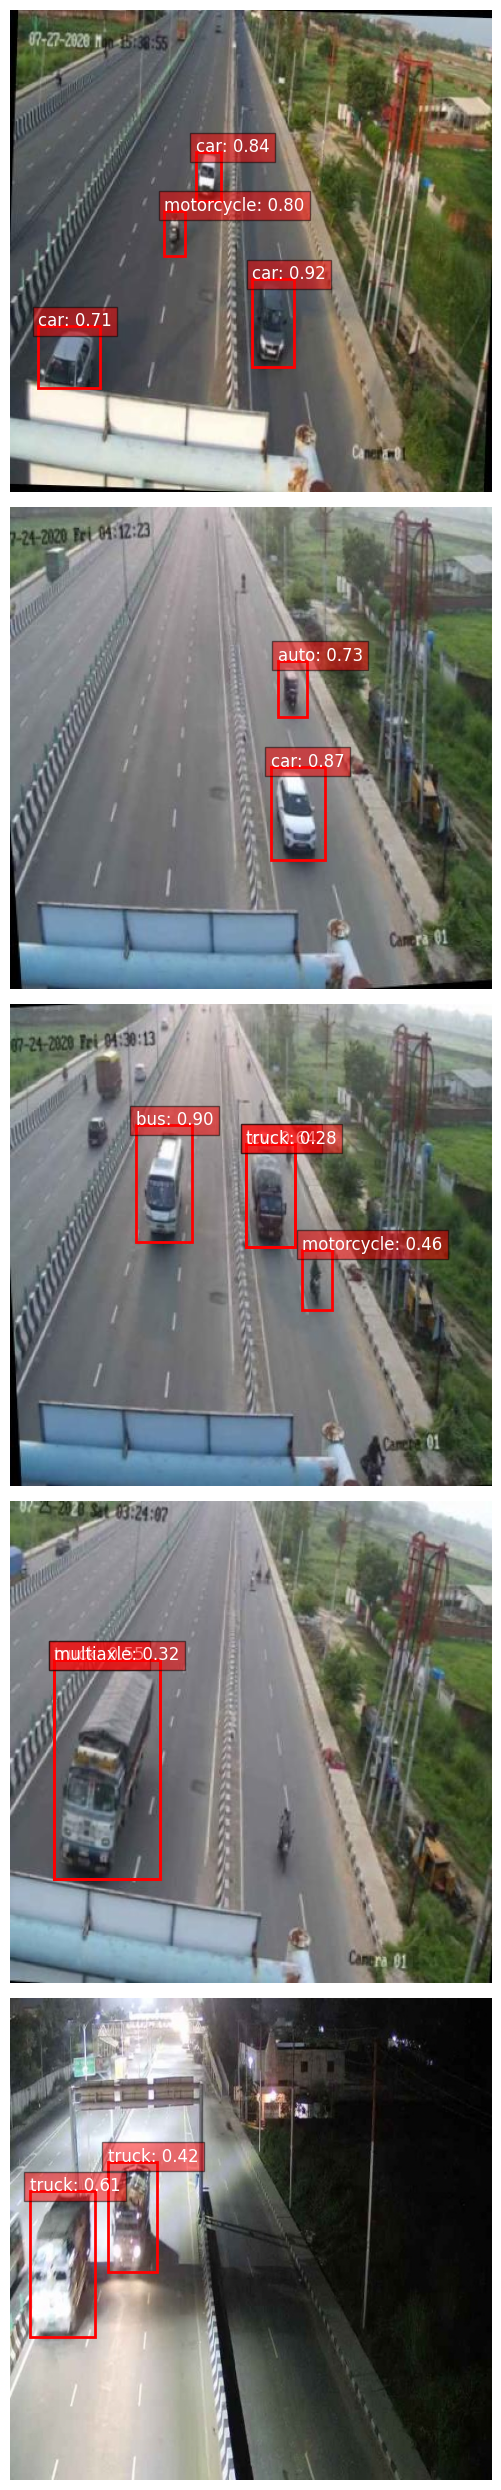

In [9]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
test_image_dir = '/kaggle/working/dataset/test/images'
test_images = os.listdir(test_image_dir)
test_images = [img for img in test_images if img.endswith('.jpg')]
sample_images = random.sample(test_images, 5)

fig, axes = plt.subplots(len(sample_images), 1, figsize=(10, len(sample_images) * 5))

for i, image_name in enumerate(sample_images):
    image_path = os.path.join(test_image_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(image_path)
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    
    for pred in results[0].boxes:
        x1, y1, x2, y2 = pred.xyxy[0].cpu().numpy()
        conf = float(pred.conf.cpu().numpy())
        class_id = int(pred.cls.cpu().numpy())
        label = model.names[class_id]
        
        axes[i].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2))
        axes[i].text(x1, y1, f'{label}: {conf:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()


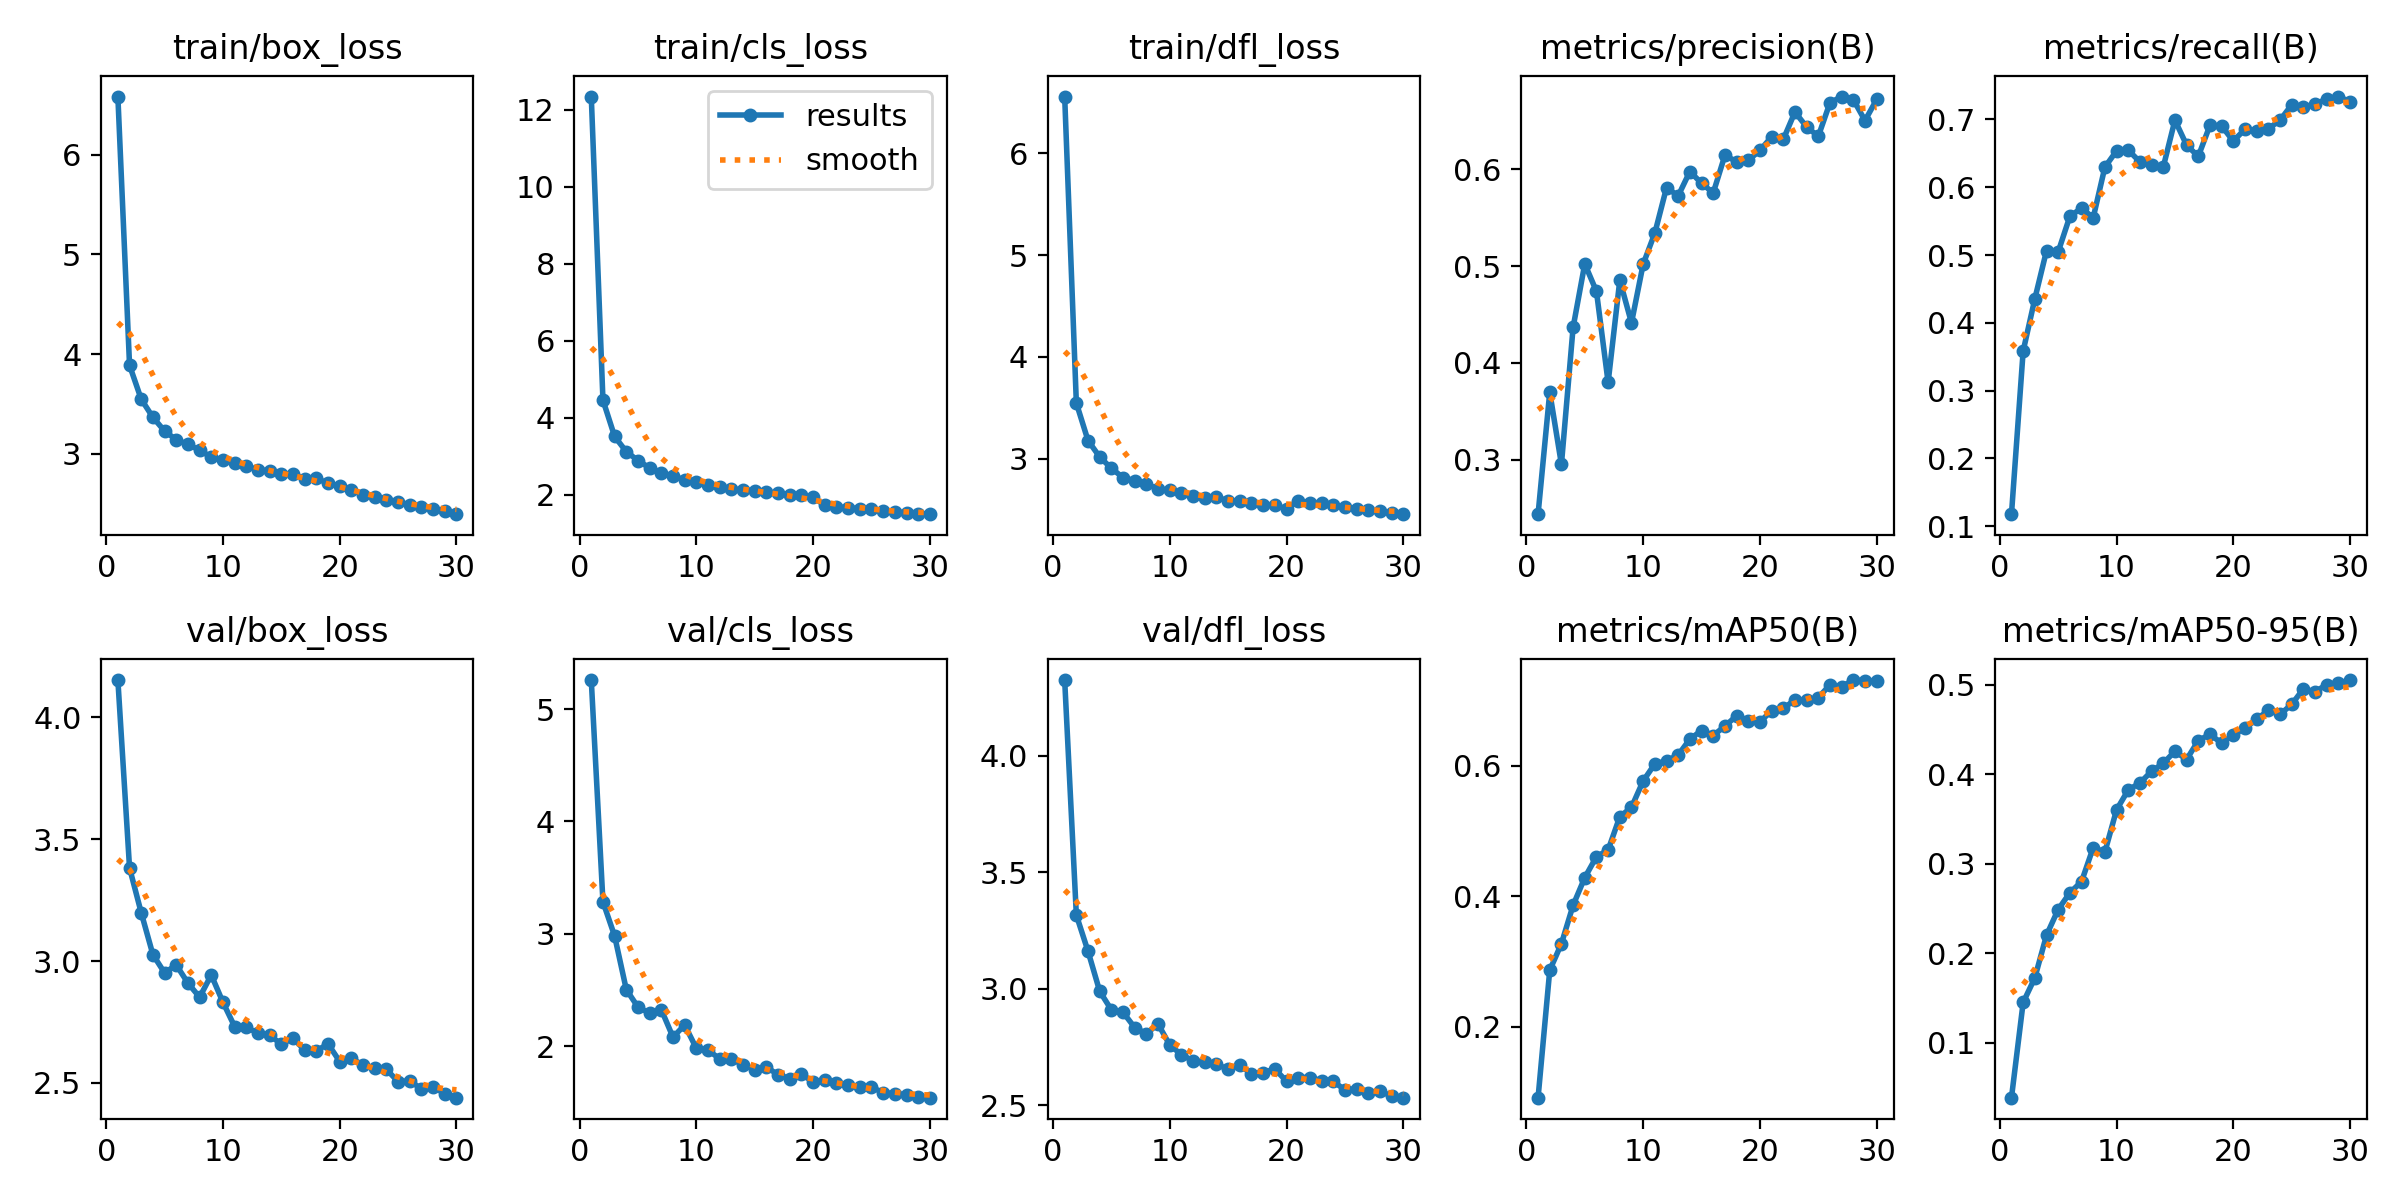

In [10]:
from IPython.display import Image,display
display(Image(filename='/kaggle/working/runs/detect/train/results.png',width=940))

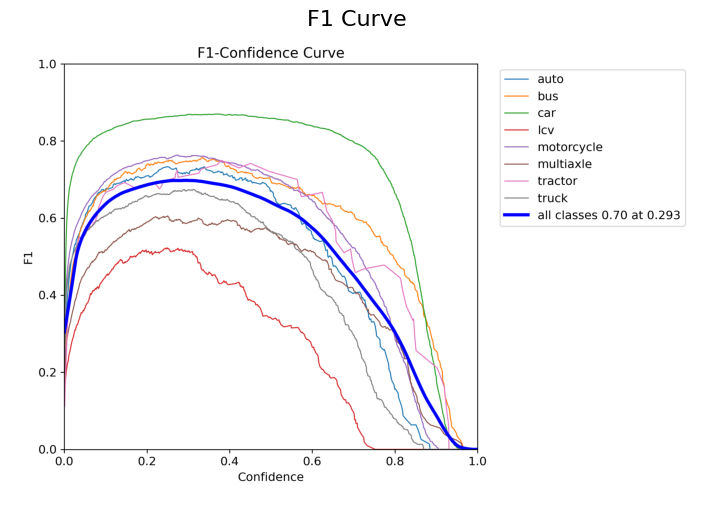

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/working/runs/detect/train/F1_curve.png')  # Replace with your image path
# Set figure size (width, height) in inches
plt.figure(figsize=(9, 6))
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('F1 Curve', fontsize=16)  # Add title with optional fontsize

plt.show()


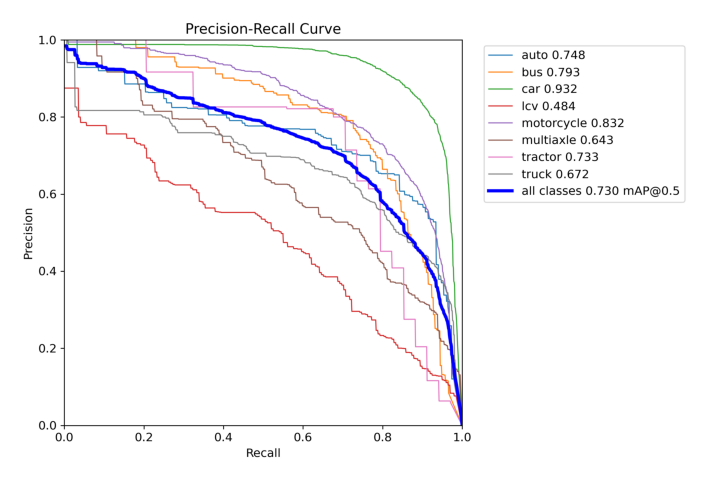

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/working/runs/detect/train/PR_curve.png')  # Replace with your image path
# Set figure size (width, height) in inches
plt.figure(figsize=(9, 6))
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
# plt.title('PR Curve', fontsize=16)  # Add title with optional fontsize

plt.show()


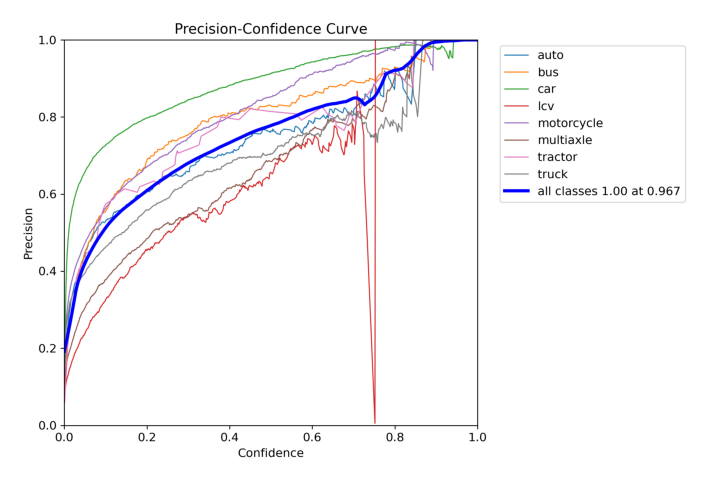

In [13]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/working/runs/detect/train/P_curve.png')  # Replace with your image path
# Set figure size (width, height) in inches
plt.figure(figsize=(9, 6))
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
# plt.title('Precision Curve', fontsize=16)  # Add title with optional fontsize

plt.show()


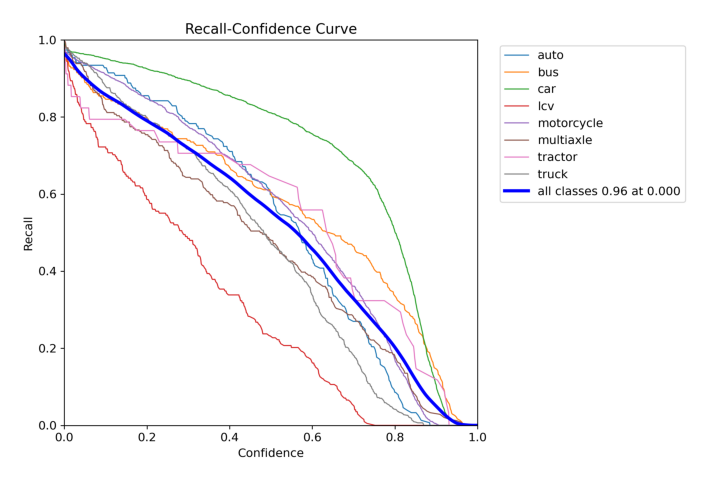

In [14]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/working/runs/detect/train/R_curve.png')  # Replace with your image path
# Set figure size (width, height) in inches
plt.figure(figsize=(9, 6))
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
# plt.title('Precision Curve', fontsize=16)  # Add title with optional fontsize

plt.show()


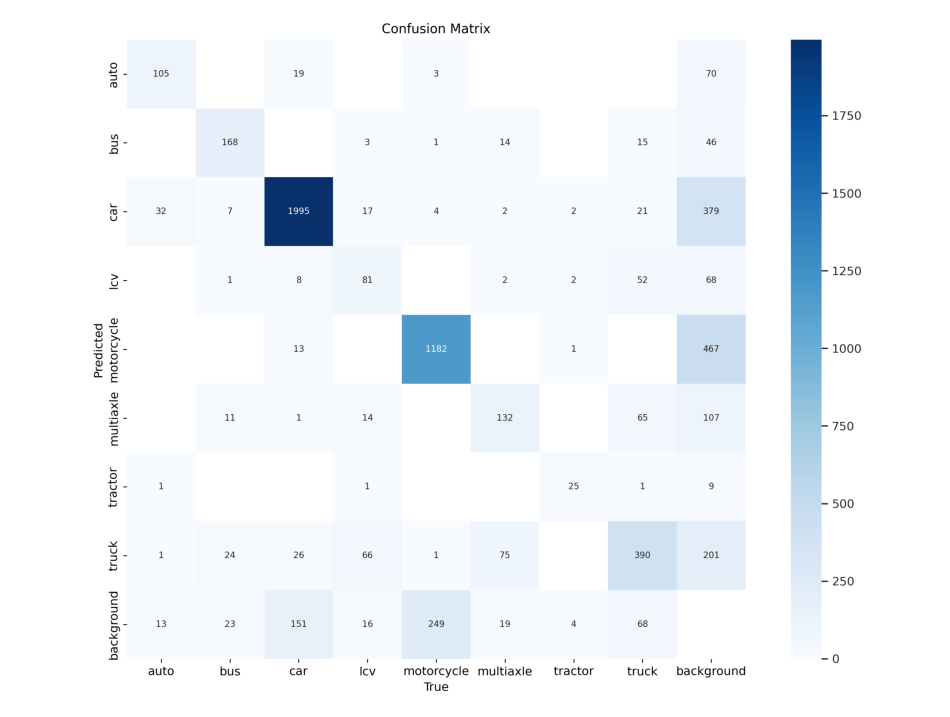

In [15]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')  # Replace with your image path
# Set figure size (width, height) in inches
plt.figure(figsize=(12, 10))
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
# plt.title('Precision Curve', fontsize=16)  # Add title with optional fontsize

plt.show()
